In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#tf.debugging.set_log_device_placement(True)

print(tf.config.experimental.list_physical_devices('CPU'))
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.0.0


In [2]:
train_data = pd.read_csv('../input/train_x.csv', index_col=0, header=None)
train_labels = pd.read_csv('../input/train_y.csv', index_col=0)
test_data = pd.read_csv('../input/test_x.csv', index_col=0, header=None)

In [3]:
train_data.shape, train_labels.shape, test_data.shape

((7200, 3072), (7200, 1), (4800, 3072))

In [4]:
train_data

,1,2,3,4,5,6,7,8,9,10,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,,,,,,,,,,,,,,,,,,,,,
0,148,159,177,145,157,174,145,157,174,146,...,193,237,211,199,232,204,195,223,203,195
1,225,225,225,225,225,225,219,219,219,216,...,252,253,254,254,248,250,251,228,232,235
2,133,119,79,179,146,117,167,121,99,115,...,87,114,163,71,128,186,98,117,175,90
3,83,102,62,88,108,68,87,108,69,82,...,21,9,18,22,12,20,25,16,21,26
4,97,100,98,94,98,91,96,97,91,108,...,120,96,106,122,98,109,124,109,120,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,117,154,180,116,152,178,116,152,178,116,...,178,116,152,178,116,152,178,117,154,180
7196,254,254,254,252,252,252,253,253,253,252,...,255,255,255,255,254,254,254,255,255,255
7197,160,160,160,161,161,161,162,162,162,158,...,174,177,177,177,172,172,172,170,170,170


In [5]:
test_data

,1,2,3,4,5,6,7,8,9,10,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,,,,,,,,,,,,,,,,,,,,,
0,235,215,190,227,204,178,215,190,162,194,...,223,252,243,231,253,244,233,252,245,234
1,29,44,37,45,72,51,50,80,52,58,...,16,43,38,30,79,80,76,123,122,123
2,38,51,33,44,59,38,49,67,40,58,...,37,75,74,54,78,77,57,70,69,49
3,136,169,206,133,171,211,138,172,208,167,...,94,198,158,97,209,169,107,200,157,104
4,153,136,117,160,136,111,175,144,114,174,...,75,111,97,68,115,94,71,106,93,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,35,40,38,49,53,52,59,64,60,36,...,96,138,156,99,137,152,96,147,158,105
4796,237,231,195,237,232,190,236,231,190,238,...,87,209,175,103,226,193,124,217,186,122
4797,109,156,237,109,156,239,110,156,240,111,...,252,182,199,251,187,201,250,192,205,251


In [6]:
train_labels

,target
0,1
1,0
2,0
3,0
4,0
...,...
7195,0
7196,0
7197,1
7198,1


In [7]:
# Check classes balance

train_labels['target'].value_counts()

0    3605
1    3595
Name: target, dtype: int64

In [8]:
# Convert to numpy arrays

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

train_labels = train_labels.to_numpy()

In [9]:
# Normalize and reshape to 32 x 32 x 3 (RGB)

train_data = train_data / 255
test_data = test_data / 255

train_data = train_data.reshape(train_data.shape[0], 32, 32, 3)
test_data = test_data.reshape(test_data.shape[0], 32, 32, 3)

In [10]:
train_data = tf.image.resize(train_data, (64, 64), method='bicubic').numpy()
test_data = tf.image.resize(test_data, (64, 64), method='bicubic').numpy()

In [11]:
# def get_sample_image(sample):
#     image = sample.reshape(32, 32, 3)
#     return image

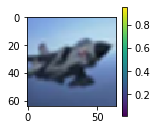

In [12]:
# Sample image

plt.figure(figsize=(2, 2))
plt.imshow(np.clip(train_data[555], 0, 1))
plt.colorbar()
plt.show()

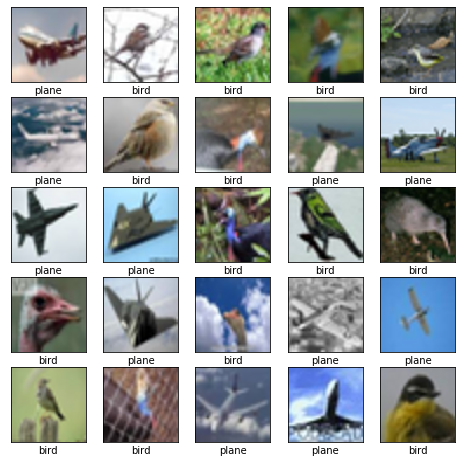

In [13]:
# Sample images 

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.clip(train_data[i], 0, 1))
    plt.xlabel('plane' if train_labels[i] else 'bird')
plt.show()

In [14]:
aug = ImageDataGenerator(horizontal_flip = True,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 15)

aug.fit(train_data, rounds=4)

In [15]:
# Just test generator

test_gen = aug.flow(train_data, train_labels, batch_size=25)

sample_data, sample_label = next(iter(test_gen))
sample_data.shape, sample_label.shape

((25, 64, 64, 3), (25, 1))

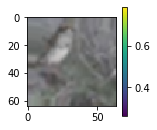

In [16]:
# Sample augmented image

plt.figure(figsize=(2, 2))
plt.imshow(np.clip(sample_data[0], 0, 1))
plt.colorbar()
plt.show()

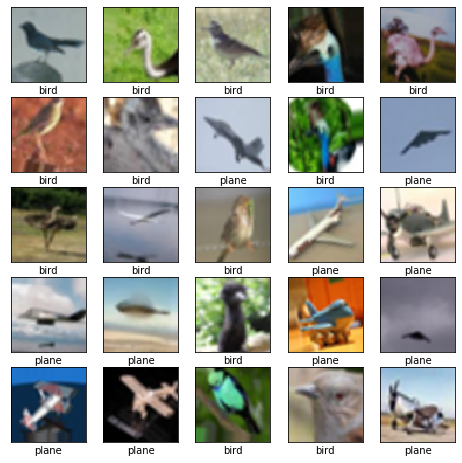

In [17]:
# Sample augmented images 

plt.figure(figsize=(8, 8))
for i, (sample_data, sample_labels) in enumerate(test_gen):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.clip(sample_data[i], 0, 1))
    plt.xlabel('plane' if sample_labels[i] else 'bird')
    if i >= 24:
        break
plt.show()

In [18]:
train_data.shape[0]

7200

In [19]:
# Generate augmentations

new_gen = aug.flow(train_data, train_labels, batch_size=train_data.shape[0])

td1, tl1 = next(iter(new_gen))
td2, tl2 = next(iter(new_gen))
td3, tl3 = next(iter(new_gen))
td4, tl4 = next(iter(new_gen))

new_train_data = np.concatenate([td1, td2, td3, td4])
new_train_labels = np.concatenate([tl1, tl2, tl3, tl4])

In [20]:
# Convolutional NN

def get_model():
    
    model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=train_data[0].shape),
        MaxPooling2D(),
        
        # BatchNormalization(axis=3),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        
        # BatchNormalization(axis=3),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dropout(0.5),
        
        Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(0.0001)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [21]:
# Train function

def train_kfolds(train_data, train_labels, folds=5, batch_size=128, epoch_num=10, aug_gen=None):

    all_loss = []
    all_accuracy = []

    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    for fold, (train_index, val_index) in enumerate(kf.split(train_data)):
        print('Processing fold #', fold)

        X_train_fold = train_data[train_index] 
        y_train_fold = train_labels[train_index]

        X_val_fold = train_data[val_index]
        y_val_fold = train_labels[val_index]

        model = get_model()
        
        if aug_gen is None:
            history = model.fit(X_train_fold, y_train_fold,
                                epochs=epochs_num, 
                                batch_size=batch_size,
                                validation_data=(X_val_fold, y_val_fold),
                                verbose=1)
        else:
            aug_gen.fit(X_train_fold, rounds=4)
            generator = aug_gen.flow(X_train_fold, y_train_fold, batch_size=batch_size)

            history = model.fit_generator(
                                generator,
                                steps_per_epoch=len(X_train_fold) / batch_size,
                                epochs=epochs_num,
                                shuffle=True,
                                verbose=1,
                                validation_data=(X_val_fold, y_val_fold),
                                # callbacks = callbacks
                                )

        loss_history = history.history['val_loss']
        all_loss.append(loss_history)

        accuracy_history = history.history['val_accuracy']
        all_accuracy.append(accuracy_history)
        
    return (all_loss, all_accuracy)

In [22]:
# Training with KFold validation

folds = 5
batch_size = 128
epochs_num = 100

all_loss, all_accuracy = train_kfolds(new_train_data, 
                                      new_train_labels, 
                                      folds=folds, 
                                      batch_size=batch_size,
                                      epoch_num=epochs_num)

# all_loss, all_accuracy = train_kfolds(train_data, 
#                                       train_labels, 
#                                       folds=folds, 
#                                       batch_size=batch_size,
#                                       epoch_num=epochs_num,
#                                       aug_gen=aug)

Processing fold # 0
Train on 23040 samples, validate on 5760 samples
Epoch 1/100
23040/23040 [==============================] - 5s 214us/sample - loss: 0.8218 - accuracy: 0.7707 - val_loss: 0.4722 - val_accuracy: 0.8181
Epoch 2/100
23040/23040 [==============================] - 3s 127us/sample - loss: 0.4574 - accuracy: 0.8241 - val_loss: 0.4320 - val_accuracy: 0.8370
Epoch 3/100
23040/23040 [==============================] - 3s 128us/sample - loss: 0.4206 - accuracy: 0.8440 - val_loss: 0.4022 - val_accuracy: 0.8530
Epoch 4/100
23040/23040 [==============================] - 3s 127us/sample - loss: 0.3979 - accuracy: 0.8548 - val_loss: 0.3881 - val_accuracy: 0.8620
Epoch 5/100
23040/23040 [==============================] - 3s 128us/sample - loss: 0.3893 - accuracy: 0.8569 - val_loss: 0.3756 - val_accuracy: 0.8634
Epoch 6/100
23040/23040 [==============================] - 3s 127us/sample - loss: 0.3830 - accuracy: 0.8596 - val_loss: 0.3650 - val_accuracy: 0.8677
Epoch 7/100
23040/23040 [

In [23]:
# Exponential moving average function

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

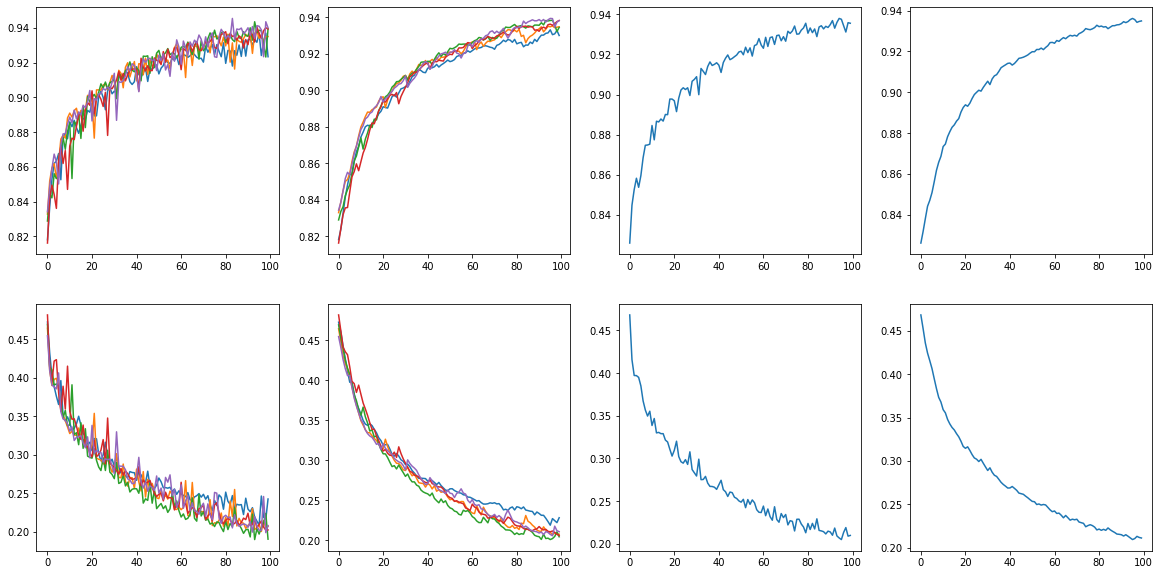

In [24]:
# Plots

n_from = 0
n_to = epochs_num
    
plt.figure(figsize=(20, 10))

# Accuracy plots
plt.subplot(2, 4, 1)
for i in range(folds):
    sns.lineplot(np.arange(n_to - n_from), all_accuracy[i][n_from:n_to]);

plt.subplot(2, 4, 2)
for i in range(folds):
    sns.lineplot(np.arange(n_to - n_from), smooth_curve(all_accuracy[i][n_from:n_to], factor=0.7));

plt.subplot(2, 4, 3)
all_accuracy_np = np.array(all_accuracy)
sns.lineplot(np.arange(n_to - n_from), all_accuracy_np.mean(axis=0)[n_from:n_to]);

plt.subplot(2, 4, 4)
sns.lineplot(np.arange(n_to - n_from), smooth_curve(all_accuracy_np.mean(axis=0)[n_from:n_to], factor=0.7));

# Loss plots
plt.subplot(2, 4, 5)
for i in range(folds):
    sns.lineplot(np.arange(n_to - n_from), all_loss[i][n_from:n_to]);

plt.subplot(2, 4, 6)
for i in range(folds):
    sns.lineplot(np.arange(n_to - n_from), smooth_curve(all_loss[i][n_from:n_to], factor=0.7));

plt.subplot(2, 4, 7)
all_loss_np = np.array(all_loss)
sns.lineplot(np.arange(n_to - n_from), all_loss_np.mean(axis=0)[n_from:n_to]);

plt.subplot(2, 4, 8)
sns.lineplot(np.arange(n_to - n_from), smooth_curve(all_loss_np.mean(axis=0)[n_from:n_to], factor=0.7));

plt.show()

In [ ]:
# Final train

epochs_num = 200

X_train = train_data
y_train = train_labels

model = get_model()
model.fit(X_train, y_train, epochs=epochs_num, batch_size=batch_size, verbose=1);

Train on 7200 samples
Epoch 1/200
7200/7200 [==============================] - 2s 224us/sample - loss: 1.4124 - accuracy: 0.7083
Epoch 2/200
7200/7200 [==============================] - 1s 120us/sample - loss: 0.5454 - accuracy: 0.7896
Epoch 3/200
7200/7200 [==============================] - 1s 127us/sample - loss: 0.4840 - accuracy: 0.8133
Epoch 4/200
7200/7200 [==============================] - 1s 124us/sample - loss: 0.4358 - accuracy: 0.8407
Epoch 5/200
7200/7200 [==============================] - 1s 119us/sample - loss: 0.4412 - accuracy: 0.8357
Epoch 6/200
7200/7200 [==============================] - 1s 120us/sample - loss: 0.4105 - accuracy: 0.8485
Epoch 7/200
7200/7200 [==============================] - 1s 117us/sample - loss: 0.4087 - accuracy: 0.8528
Epoch 8/200
7200/7200 [==============================] - 1s 116us/sample - loss: 0.4084 - accuracy: 0.8531
Epoch 9/200
7200/7200 [==============================] - 1s 118us/sample - loss: 0.3919 - accuracy: 0.8585
Epoch 10/200
72

In [33]:
# Make Predictions

y_pred = model.predict(test_data)

y_pred[:10]

array([[0.00156328],
       [0.01887071],
       [0.27329147],
       [0.977346  ],
       [0.9964613 ],
       [0.0171687 ],
       [0.9916917 ],
       [0.99534273],
       [0.05835289],
       [0.99673396]], dtype=float32)

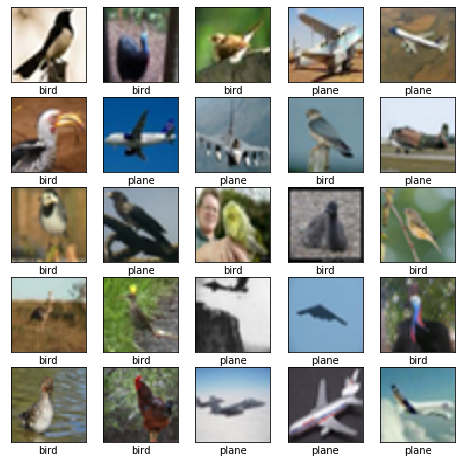

In [34]:
# Show some predictions

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.clip(test_data[i], 0, 1))
    plt.xlabel('plane' if y_pred[i] >= 0.5 else 'bird')
plt.show()

In [35]:
# Make submission

submission = pd.DataFrame({'id': range(test_data.shape[0]),
                           'target': (y_pred >= 0.5).astype('int').flatten()
                          })

In [36]:
submission.tail(3)

,id,target
4797,4797,1
4798,4798,1
4799,4799,0


In [37]:
submission.to_csv('submission.csv', index=False)

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

In [39]:
# model.save('birds_or_aircraft.h5')